In [32]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [44]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"
Foldernames = ["/Data/v3"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

print(data[0][0].head)

Loading... Folder 1 of 1, Sample 1 of 6
Loading... Folder 1 of 1, Sample 2 of 6
Loading... Folder 1 of 1, Sample 3 of 6
Loading... Folder 1 of 1, Sample 4 of 6
Loading... Folder 1 of 1, Sample 5 of 6
Loading... Folder 1 of 1, Sample 6 of 6
<bound method NDFrame.head of          presFesto-0  DigOut-1    AWM5-5  SSCDP05-3      Time
0           0.000070       0.0  0.000361   8.189214     0.001
1          -0.000047       0.0  0.000055   6.938498     0.002
2          -0.000133       0.0 -0.000158   5.922659     0.003
3          -0.000191       0.0 -0.000288   5.106436     0.004
4          -0.000225       0.0 -0.000348   4.454568     0.005
...              ...       ...       ...        ...       ...
1834195    -0.000470       0.0  0.000905   4.133770  1834.196
1834196    -0.000438       0.0  0.000967   6.298725  1834.197
1834197    -0.000406       0.0  0.001068   9.561169  1834.198
1834198    -0.000373       0.0  0.001211  14.059957  1834.199
1834199    -0.000339       0.0  0.001404  19.933

C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


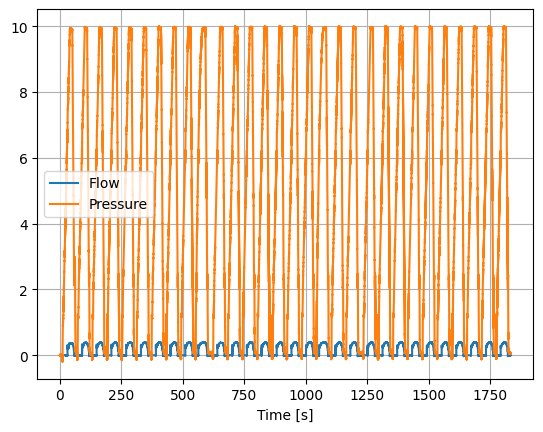

In [111]:
#Plot the profiles over time
#k =0
for i, df in enumerate(data[0]):
    flow = data[0][i]['AWM5-5'].values #SLPM
    time = data[0][i]['Time']
    #P_setpoint = data[0][i]['presFesto-1'].values
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'presFesto-1' in df.columns:
        P_setpoint = data[0][i]['presFesto-1'].values
    elif 'presFesto-0' in df.columns:
        P_setpoint = data[0][i]['presFesto-0'].values

    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        # Skip this iteration and move to the next experiment

    if i ==3:
        break
        

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
#plt.plot(time, P_setpoint)
#plt.plot(time,data[0][i]['presFesto-1']*100,label ="P setpoint")
plt.legend()
plt.xlabel('Time [s]')
#plt.ylim(-0.1,0.1)
plt.grid()

In [54]:
data[1]

{'Samplerate': [1000, 1000, 1000, 1000, 1000, 1000],
 'Samplename': ['DS30_r9_t100_L11',
  'DS30_r9_t100_L09',
  'DS30_r9_t100_L07',
  'DS30_r9_t100_L05',
  'DS30_r9_t125_L11',
  'DS30_r9_t150_L11'],
 'Offset': [{'presFesto-0': 4.998001222222222,
   'DigOut-1': -0.0520727777777778,
   'AWM5-5': 1.0497440000000002,
   'SSCDP05-3': 2.521161},
  {'presFesto-0': 4.9930522222222224,
   'DigOut-1': -0.05165455555555558,
   'AWM5-5': 1.0482075555555554,
   'SSCDP05-3': 2.5169622222222223},
  {'presFesto-0': 4.992401222222222,
   'DigOut-1': -0.05315344444444446,
   'AWM5-5': 1.047960777777778,
   'SSCDP05-3': 2.5171574444444444},
  {'presFesto-0': 4.993335666666668,
   'DigOut-1': -0.05285055555555558,
   'AWM5-5': 1.0479685555555556,
   'SSCDP05-3': 2.5164547777777773},
  {'presFesto-0': 4.995357222222222,
   'DigOut-1': -0.05389988888888891,
   'AWM5-5': 1.044120888888889,
   'SSCDP05-3': 2.520061},
  {'presFesto-0': 4.991534111111111,
   'DigOut-1': -0.053466888888888904,
   'AWM5-5': 1.04

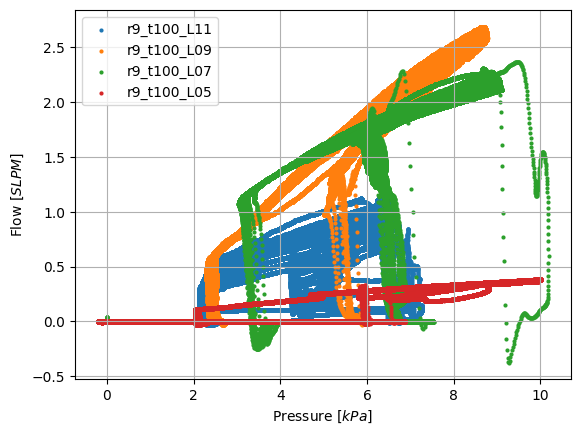

In [56]:
plt.figure()  # Create a new figure for each experiment
for i, df in enumerate(data[0]):
    
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment
   
        
    # Assuming Time is common in all DataFrames and is in a column named 'Time'
    #Time = df['Time'].values
    flow = data[0][i]['AWM5-5'].values #SLPM

    plt.scatter( P/1000,flow, label=data[1]['Samplename'][i][5:],marker='.', linewidth=0.000001)
    plt.xlabel('Pressure [$kPa$]')
    plt.ylabel('Flow [$SLPM$]')
    plt.legend(loc='upper left')
    if i==3:
        break 
  
#plt.xlim(0,8) 
plt.grid()
#plt.xlim(0,5)
plt.show() 

Prepare data: slice per run

In [142]:
# Slice data per run 

data_sliced = []
for index,value in enumerate(data[0]):
    runs = [] # new list for all the runs in data[0]
    start = 0
    run_count = 1  # Counter for run numbe
    flow = data[0][index]['AWM5-5'].values

    # Check which pressure sensor is used 
    df = data[0][index]

    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable pressure sensor data.")
        continue  # Skip this iteration and move to the next experiment

    while start < len(data[0][index]['DigOut-1']):
        start = np.argmax(data[0][index]['DigOut-1'][start:] == 1) +start  # Correcting index for slicing
        end = np.argmax(data[0][index]['DigOut-1'][start:] == 0)+start   # Correcting index for slicing
        
        if end <= start:  # Break if no more valid segments are found
            break

        # Reschale the flow data to compensate for drifting 
        first_value = flow[start]
        flow_rescaled =flow[start:end] - first_value
      
        # Create a DataFrame for this run
        run_df = pd.DataFrame({
            'Time': np.arange(start, end),  # You can replace this with the actual time data if you have it
            'Rescaled_Flow': flow_rescaled[:end - start],
            'Pressure': P[start:end]/1000   # Assuming P is already an array
        })

        # Append this DataFrame to the list
        runs.append(run_df)   

        start = end + 5  # Move to next segment
        run_count += 1  # Increment run counter
    data_sliced.append(runs)

#Remove wrong measurement
data_sliced[0].pop(8)   # touched setup with finger and messed up flow measurement


,Time,Rescaled_Flow,Pressure
0,491370,0.000000,-0.087255
1,491371,-0.000014,-0.102464
2,491372,0.000002,-0.119031
3,491373,-0.000128,-0.133874
4,491374,-0.000181,-0.148891
...,...,...,...
50100,541470,0.000150,0.230430
50101,541471,0.000281,0.245453
50102,541472,0.000387,0.260526
50103,541473,0.000399,0.276642


,Time,Rescaled_Flow,Pressure
0,491370,0.000000,-0.087255
1,491371,-0.000014,-0.102464
2,491372,0.000002,-0.119031
3,491373,-0.000128,-0.133874
4,491374,-0.000181,-0.148891
...,...,...,...
50100,541470,0.000150,0.230430
50101,541471,0.000281,0.245453
50102,541472,0.000387,0.260526
50103,541473,0.000399,0.276642


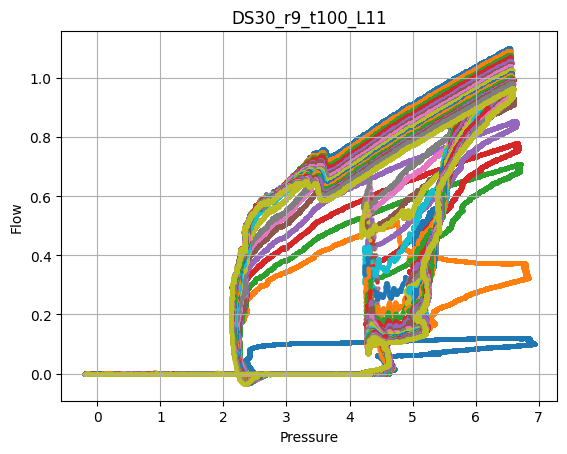

In [160]:
qq = 0
for uu, yy in enumerate(data_sliced[qq]):
    Q = yy['Rescaled_Flow']
    P = yy['Pressure']
    plt.scatter(P, Q,marker='.', linewidth=0.000001)
#plt.legend()
plt.title(data[1]['Samplename'][qq])
plt.xlabel('Pressure')
plt.ylabel('Flow')
plt.grid()
plt.show()   


In [123]:
len(data_sliced)

6

Extract opening and closing pressure

In [165]:

# Function for moving average smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Plot sliced data and extract opening pressure 
P_open = []
P_close = []

open_threshold = 0.1 # slpm
close_threshold = 0.09 # slpm

# Window size for smoothing
window_size = 100  # You can adjust this value based on your requirements

# Initialize a flag to indicate whether the threshold has been crossed from below
crossed_threshold = False

for sample in data_sliced:   
    # Initialize lists for each sample
    P_open_sample = []
    P_close_sample = []
    
    for run in sample:
        Q_raw = run['Rescaled_Flow']
        P_raw = run['Pressure']
        
        # Apply moving average smoothing
        Q = moving_average(Q_raw, window_size)
        P_sliced = moving_average(P_raw, window_size)
        
        # Extract opening pressure
        opening_index = np.argmax(Q > open_threshold)  # If the flow passes a certain threshold, then we can assume it is open
        P_open_sample.append(P_sliced[opening_index])  # Use previous index to recover the pressure 
        
        # Loop through the data
        for jj in range(1, len(Q)):
            # Check for crossing the threshold from below to above
            if Q[jj] > close_threshold:
                crossed_threshold = True
            
            # Check for crossing the threshold from above to below after it's been crossed from below
            if crossed_threshold and Q[jj] < close_threshold:
                P_close_sample.append(P_sliced[jj])
                
                # Reset the flag if you are only interested in the first such occurrence
                crossed_threshold = False
                break
    
    # Append the lists for each sample to the main lists
    P_open.append(P_open_sample)
    P_close.append(P_close_sample)

Results

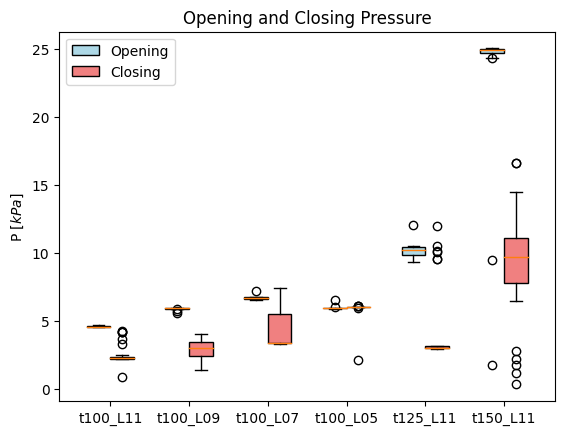

In [47]:
fig, ax = plt.subplots()

# Width of a boxplot
box_width = 0.3

# Positions of the opening pressure boxplots
open_positions = [x - box_width/2 for x in range(len(P_open))]

# Positions of the closing pressure boxplots
close_positions = [x + box_width/2 for x in range(len(P_close))]

# Plot the opening pressure boxplots
bp_open = ax.boxplot(P_open, positions=open_positions, widths=box_width, patch_artist=True, boxprops=dict(facecolor='lightblue'), labels=['Opening']*len(P_open))

# Plot the closing pressure boxplots
bp_close = ax.boxplot(P_close, positions=close_positions, widths=box_width, patch_artist=True, boxprops=dict(facecolor='lightcoral'), labels=['Closing']*len(P_close))

# Set the title and labels
plt.title("Opening and Closing Pressure")
plt.ylabel("P [$kPa$]")

# Set the x-ticks and labels
# Extract the part of the sample name after "t"
sample_names = data[1]['Samplename']
sample_names_after_t = ['t'+name.split('t')[-1] for name in sample_names]

# Set the x-ticks and labels
tick_positions = range(len(sample_names_after_t))
plt.xticks(tick_positions, sample_names_after_t)

# Show the legend
handles = [bp_open['boxes'][0], bp_close['boxes'][0]]
labels = ['Opening', 'Closing']
ax.legend(handles, labels)

plt.show()


# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.scatter(P[i:i+10]/1000, flow[i:i+10], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time [s]')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)


save_plot('Pressure_vs_flow')


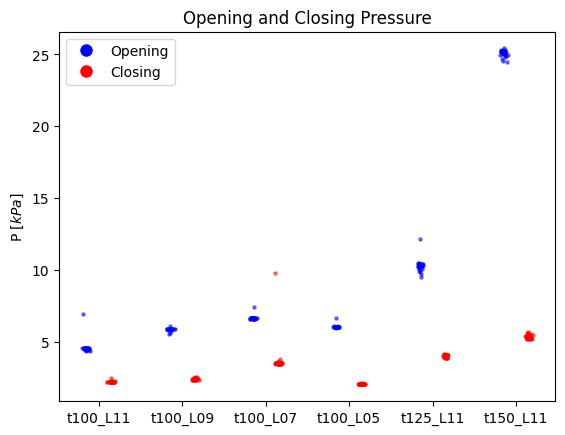

In [166]:
fig, ax = plt.subplots()

# Width of a boxplot
box_width = 0.3

# Positions of the opening pressure boxplots
open_positions = [x - box_width / 2 for x in range(len(P_open))]

# Positions of the closing pressure boxplots
close_positions = [x + box_width / 2 for x in range(len(P_close))]

# Scatter plot of individual data points
for i, (open_data, close_data) in enumerate(zip(P_open, P_close)):
    x_open = np.random.normal(open_positions[i], 0.02, size=len(open_data))  # Add jitter to the x-values
    x_close = np.random.normal(close_positions[i], 0.02, size=len(close_data))  # Add jitter to the x-values

    ax.scatter(x_open, open_data, color='blue', alpha=0.5, s=5)  # Scatter plot for opening pressures
    ax.scatter(x_close, close_data, color='red', alpha=0.5, s=5)  # Scatter plot for closing pressures

# Set the title and labels
plt.title("Opening and Closing Pressure")
plt.ylabel("P [$kPa$]")

# Set the x-ticks and labels
# Extract the part of the sample name after "t"
sample_names_after_t = ['t' + name.split('t')[-1] for name in sample_names]

# Set the x-ticks and labels
tick_positions = range(len(sample_names_after_t))
plt.xticks(tick_positions, sample_names_after_t)

# Show the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Opening', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Closing', markerfacecolor='red', markersize=10)]
labels = ['Opening', 'Closing']
ax.legend(handles, labels)


plt.show()


C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

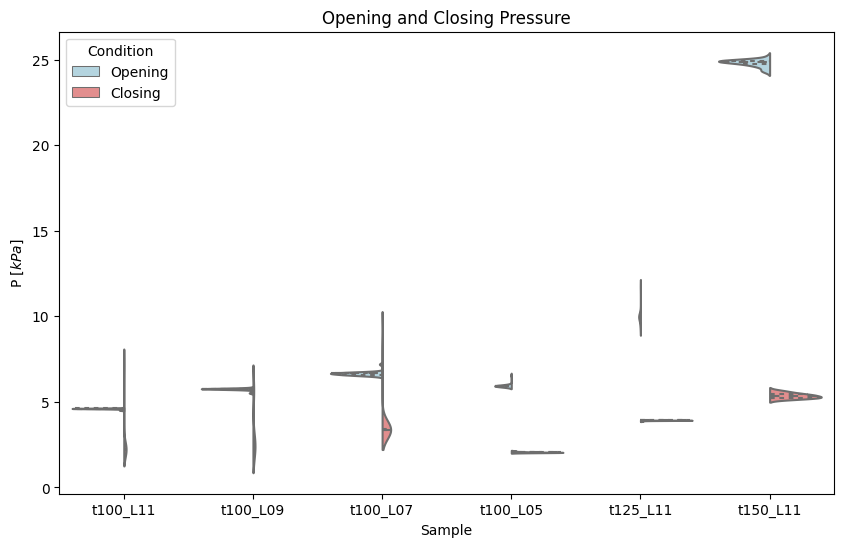

In [81]:
# Prepare the data in long-form
values = []
samples = []
conditions = []

for i, (open_data, close_data, sample_name) in enumerate(zip(P_open, P_close, sample_names_after_t)):
    values.extend(open_data)
    samples.extend([sample_name] * len(open_data))
    conditions.extend(['Opening'] * len(open_data))
    
    values.extend(close_data)
    samples.extend([sample_name] * len(close_data))
    conditions.extend(['Closing'] * len(close_data))

data_1 = pd.DataFrame({
    'Value': values,
    'Sample': samples,
    'Condition': conditions
})

# Create the split violin plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='Sample', y='Value', hue='Condition', data=data_1, split=True, palette={'Opening': 'lightblue', 'Closing': 'lightcoral'}, inner='quartile')

# Set the title and labels
plt.title('Opening and Closing Pressure')
plt.xlabel('Sample')
plt.ylabel('P [$kPa$]')

# Set the x-ticks and labels
ax.set_xticklabels(sample_names_after_t)

# Show the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Condition')

plt.show()


C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

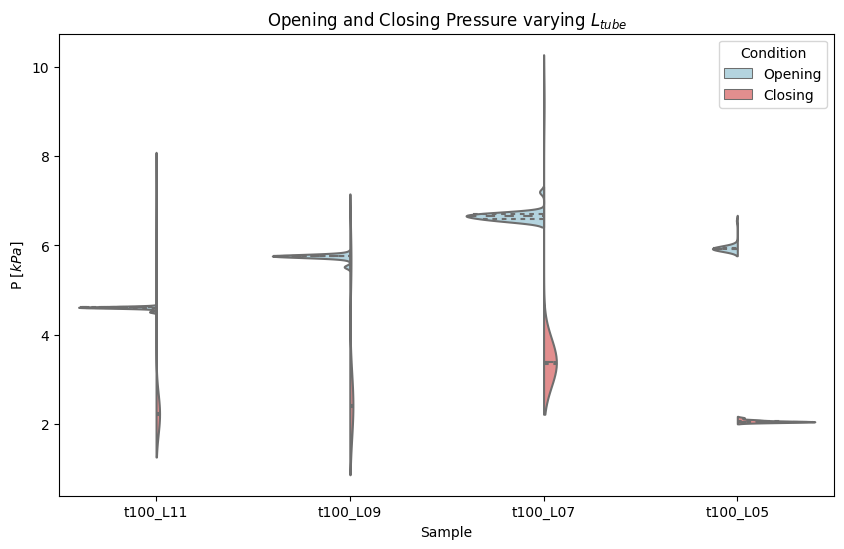

C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

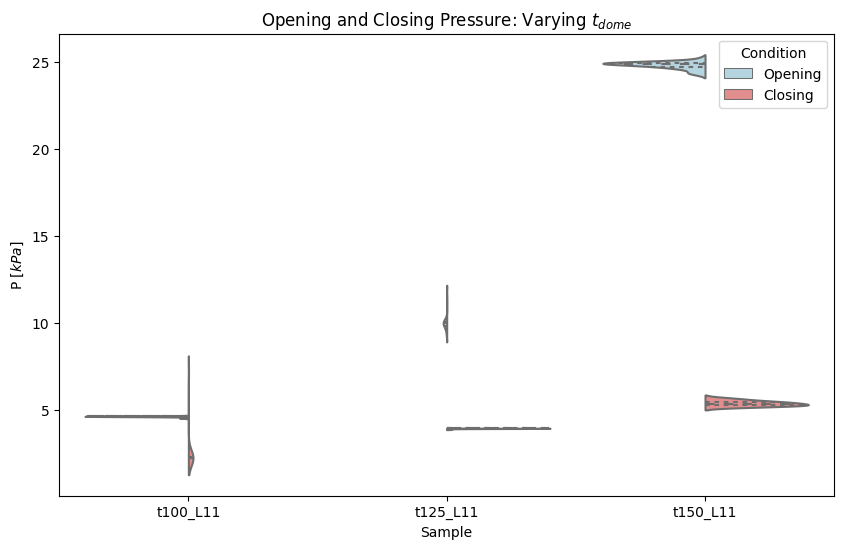

In [90]:
# Prepare the data in long-form
values = []
samples = []
conditions = []

for i, (open_data, close_data, sample_name) in enumerate(zip(P_open, P_close, sample_names_after_t)):
    values.extend(open_data)
    samples.extend([sample_name] * len(open_data))
    conditions.extend(['Opening'] * len(open_data))
    
    values.extend(close_data)
    samples.extend([sample_name] * len(close_data))
    conditions.extend(['Closing'] * len(close_data))

data_2 = pd.DataFrame({
    'Value': values,
    'Sample': samples,
    'Condition': conditions
})

# Define the sample names for the first graph
samples_graph1 = ['t100_L11', 't100_L09', 't100_L07', 't100_L05']

# Filter the data for the first graph
data_graph1 = data_1[data_2['Sample'].isin(samples_graph1)]

# Create the first graph
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='Sample', y='Value', hue='Condition', data=data_graph1, split=True, palette={'Opening': 'lightblue', 'Closing': 'lightcoral'}, inner='quartile')

# Set the title and labels for the first graph
plt.title('Opening and Closing Pressure varying $L_{tube}$')
plt.xlabel('Sample')
plt.ylabel('P [$kPa$]')

# Show the legend for the first graph
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Condition')

plt.show()

# Define the sample names for the second graph
samples_graph2 = ['t100_L11', 't125_L11', 't150_L11']

# Filter the data for the second graph
data_graph2 = data_1[data_2['Sample'].isin(samples_graph2)]

# Create the second graph
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='Sample', y='Value', hue='Condition', data=data_graph2, split=True, palette={'Opening': 'lightblue', 'Closing': 'lightcoral'}, inner='quartile')

# Set the title and labels for the second graph
plt.title('Opening and Closing Pressure: Varying $t_{dome}$')
plt.xlabel('Sample')
plt.ylabel('P [$kPa$]')

# Show the legend for the second graph
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Condition')

plt.show()


C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

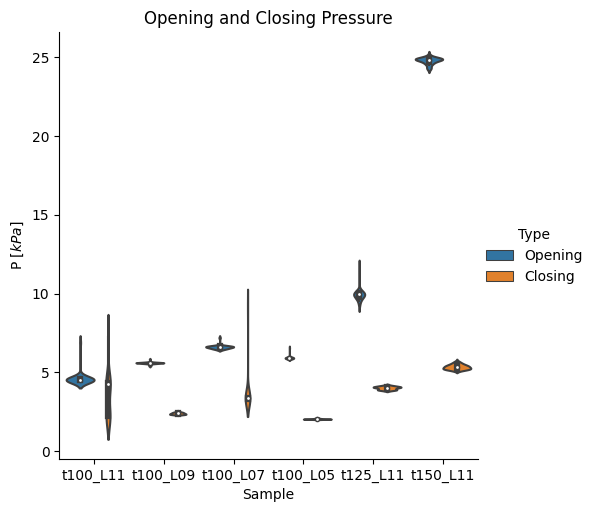

In [108]:
# Flatten the data and create a DataFrame
data_open = []
data_close = []
labels = []
for i, (open_data, close_data, name) in enumerate(zip(P_open, P_close, sample_names)):
    data_open.extend(open_data)
    data_close.extend(close_data)
    labels.extend(['t'+name.split('t')[-1] for _ in open_data])

df_open = pd.DataFrame({'Pressure': data_open, 'Type': 'Opening', 'Label': labels})
df_close = pd.DataFrame({'Pressure': data_close, 'Type': 'Closing', 'Label': labels})
df = pd.concat([df_open, df_close])

# Create a catplot
g = sns.catplot(x='Label', y='Pressure', hue='Type', data=df, kind='violin')
g.set_axis_labels("Sample", "P [$kPa$]")
plt.title("Opening and Closing Pressure")

plt.show()